# Theoretical Background on Classification

## Logistic regression

Imagine that you have a bunch of observations consisting of inputs/features $\mathbf{x}_{1:n}=(\mathbf{x}_1,\dots,\mathbf{x}_n)$ and the corresponding targets $y_{1:n}=(y_1,\dots,y_n)$.
Remember that we say that we have a classification problem when the targets are discrete labels.
In particular, if the labels are two, say 0 or 1, we say we have a *binary classification problem*.

The logistic regression model is one of the simplest ways to solve the binary classification problem.
It goes as follows.
You model the probability that $y=1$ conditioned on having $\mathbf{x}$ by:

$$
p(y=1|\mathbf{x},\mathbf{w}) = \operatorname{sigm}\left(\sum_{j=1}^mw_j\phi_j(\mathbf{x})\right) = \operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x})\right),
$$

where $\operatorname{sigm}$ is the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function), the $\phi_j(\mathbf{x})$ are $m$ basis functions/features,

$$
\boldsymbol{\phi}(\mathbf{x}) = \left(\phi_1(\mathbf{x}),\dots,\phi_m(\mathbf{x})\right)
$$

and the $w_j$'s are $m$ weights that we need to learn from the data.
The sigmoid function is defined by:

$$
\operatorname{sigm}(z) = \frac{1}{1+e^{-z}},
$$

and all it does is take a real number and map it to $[0,1]$ to represent a probability.
In other words, logistic regression is just a generalized linear model passed through the sigmoid function so that it is mapped to $[0,1]$.

If you need the probability of $y=0$, it is given by the obvious rule:

$$
p(y=0|\mathbf{x},\mathbf{w}) = 1 - p(y=1|\mathbf{x},\mathbf{w}) = 1 - \operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x})\right)
$$

You can represent the probability of an arbitrary label $y$ conditioned on $\mathbf{x}$ using this simple trick:

$$
p(y|\mathbf{x},\mathbf{w}) =
\left[\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x})\right)\right]^y
\left[1-\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x})\right)\right]^{1-y}.
$$

Notice that when $y=1$, the exponent of the second term becomes zero, and thus, the term becomes one.
Similarly, when $y=0$, the exponent of the first term becomes zero, and thus the term becomes one.
This trick gives the correct probability for each case.

The likelihood of all the observed data is:

$$
p(y_{1:n}|\mathbf{x}_{1:n},\mathbf{w}) = \prod_{i=1}^np(y_i |\mathbf{x}_i, \mathbf{w})
= \prod_{i=1}^n
\left[\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_i)\right)\right]^{y_i}
\left[1-\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_i)\right)\right]^{1-y_i}.
$$

We can now find the best weight vector $\mathbf{w}$ using the [maximum likelihood principle](https://purduemechanicalengineering.github.io/me-297-intro-to-data-science/lecture13/the-maximum-likelihood-principle.html).
We need to solve the optimization problem:

$$
\max_{\mathbf{w}}\log p(y_{1:n}|\mathbf{x}_{1:n},\mathbf{w})
= \max_{\mathbf{w}}\sum_{i=1}^n\left\{y_i\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_i)\right)+(1-y_i)\left[1-\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_i)\right)\right]\right\}.
$$

Notice that the following maximization problem is equivalent to minimizing this loss function:

$$
L(\mathbf{w}) = -\sum_{i=1}^n\left\{y_i\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_i)\right)+(1-y_i)\left[1-\operatorname{sigm}\left(\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_i)\right)\right]\right\}.
$$

This function is known as the [cross-entropy loss function](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression), and you are very likely to encounter it if you dive deeper into modern data science.
For example, we use the same loss function to train state-of-the-art deep neural networks that classify images.
You now know that it does not come out of the blue.
It comes from the maximum likelihood principle.


## Making-decisions

Based on the data, suppose you have found a point estimate for the weights $\mathbf{w}$.
Let's call that point estimate $\mathbf{w}^*$.
You can predict the probability of $y$ taking any value by evaluating $p(y|\mathbf{x},\mathbf{w}=\mathbf{w}^*)$.
That's what your model predicts: a probability mass function over the two possible values of $y$.
Now, you have to decide whether $y$ equals 0 or 1.
How do you do this?
You need to pose and solve a decision-making problem.
Like we did before, you start by quantifying the loss you incur when you make the wrong decision.
Mathematically, let $\hat{y}$ be what you choose, and $y$ be the true value of the label.
You need to define the function:

$$
\ell(\hat{y},y) = \text{the cot of picking $\hat{y}$ when the true value is $y$}.
$$

Of course, the choice of the cost function is subjective.
For the binary classification case, we are looking at $\ell(\hat{y},y)$ is just a $2\times 2$ matrix (two possibilities for $\hat{y}$ and two possibilities for $y$).
Once you have your loss function, the rational thing to do is to pick the $\hat{y}$ that minimizes your *expected loss*.
The expectation is over what you think the true value of $y$ is.
This state of knowledge is summarized in the trained logistic regression model.
Therefore, the problem you need to solve to pick $\hat{y}$ is:

$$
\min_{\hat{y}} \sum_{y=0,1} \ell(\hat{y},y)p(y|\mathbf{x},\mathbf{w}=\mathbf{w}^*).
$$

This is a different optimization problem for each possible $\mathbf{x}$ value.


## Diagnostics for classification

As always, you must split your dataset into training and validation subsets.
There are many different diagnostics you can use on your validation dataset.
The two most important ones are:
+ [Accuracy score](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score). The accuracy score is the fraction of correctly classified data points. It is a number between 0 and 1. The higher, the better.
+ [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). The confusion matrix is a $2\times 2$ matrix that tells you how many data points were classified correctly and how many were classified incorrectly. The higher the numbers on the diagonal, the better.


## Multi-class classification

Imagine that you have a bunch of observations consisting of inputs/features $\mathbf{x}_{1:n}=(\mathbf{x}_1,\dots,\mathbf{x}_n)$ and the corresponding discrete labels $y_{1:n}=(y_1,\dots,y_n)$.
But now, there are more than two labels.
There are $K$ possible values for the labels.
That's *multi-class classification*.

## Multi-class logistic regression

Like before, assume that you have a set of $m$ basis function $\phi_j(\mathbf{x})$, which we will use to make generalized linear models.
The multi-class logistic regression model is defined by:

$$
p(y=k|\mathbf{x}, \mathbf{W}) = \operatorname{softmax}_k\left(\mathbf{w}_1^T\boldsymbol{\phi}(\mathbf{x}),\dots,\mathbf{w}_K^T\boldsymbol{\phi}(\mathbf{x})\right),
$$

where

$$
\mathbf{W} = \left(\mathbf{w}_1,\dots,\mathbf{w}_K\right)
$$

is a collection of $K$ weight vectors with $m$ elements (one $m$-dimensional weight vector for each of the $K$ classes), and $\operatorname{softmax}_k(z_1,\dots,z_K)$ is the $k$-th component of a vector function of $K$ real inputs defined by:

$$
\operatorname{softmax}_k(z_1,\dots,z_K) = \frac{z_k}{\sum_{k'=1}^Kz_{k'}}.
$$

The role of the softmax is to take the real outputs of the generalized linear models corresponding to each label and map them to a probability.
Just like in the logistic regression case, you can train the model by putting a prior on the weights and then maximizing the logarithm of the posterior.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.
    
    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified 
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

# Logistic regression with one variable (High melting explosives)


[High Melting Explosives](https://en.wikipedia.org/wiki/HMX) (HMX) have applications as detonators of nuclear weapons and as solid rocket propellants.
We will use logistic regression to build the probability that a specific HMX block explodes when dropped from a given height.
To this end, we will use data from a 1987 Los Alamos Report
(L. Smith, “Los Alamos National Laboratory explosives orientation course: Sensitivity and sensitivity tests to impact, friction, spark and shock,” Los Alamos National Lab, NM (USA), Tech. Rep., 1987).
Let's download the raw data and load them.
We will use the [Python Data Analysis Library](https://pandas.pydata.org/):

In [4]:
import pandas as pd
data = pd.read_csv('hmx_data.csv')

Each row of the data is a different experiment.
There are two columns:

+ The first column is **Height**: From what height (in cm) the specimen was dropped?
+ The second column is **Result**: Did the specimen explode (E) or not (N)?

Here is how to see the raw data:

In [5]:
data

,Height,Result
0,40.5,E
1,40.5,E
2,40.5,E
3,40.5,E
4,40.5,E
5,40.5,E
6,40.5,E
7,40.5,E
8,40.5,E
9,40.5,E


Let's encode the labels as $1$ and $0$ instead of E and N.
Let's do this below:

In [6]:
# Extract data for classification in numpy array
# Features
x = data['Height'].values
# Labels (must be integer)
label_coding = {'E': 1, 'N': 0}
y = np.array(
    [
        label_coding[r]
        for r in data['Result']
    ]
)
data['y'] = y
data

,Height,Result,y
0,40.5,E,1
1,40.5,E,1
2,40.5,E,1
3,40.5,E,1
4,40.5,E,1
5,40.5,E,1
6,40.5,E,1
7,40.5,E,1
8,40.5,E,1
9,40.5,E,1


Let's visualize the data.
Notice that lots of observations fall on top of each other.

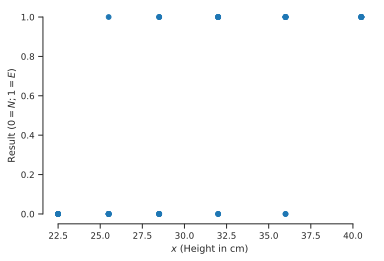

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.set_xlabel('$x$ (Height in cm)')
ax.set_ylabel('Result ($0=N; 1=E$)')
sns.despine(trim=True);

Let's train a logistic regression model with just a linear feature using scikit-learn:

In [8]:
from sklearn.linear_model import LogisticRegression

# The design matrix
X = np.hstack(
    [
        np.ones((x.shape[0], 1)),
        x[:, None]]
)

# Train the model (penalty = 'none' means that we do not add a prior on the weights)
# we are effectively just maximizing the likelihood of the data

# Assuming X and y are previously defined features and target variables
# If you do not want to apply any penalty, use 'none'
model = LogisticRegression(
    penalty='none',  # Specify 'none' to apply no regularization
    fit_intercept=False
).fit(X, y)


Here is how you can get the trained weights of the model:

In [9]:
model.coef_

array([[-12.68785875,   0.41143587]])

And here is how you can make predictions at some arbitrary heights:

In [10]:
x_predict = np.array([10.0, 20.0, 30.0, 40.0, 50.0])
X_predict = np.hstack(
    [
        np.ones((x_predict.shape[0], 1)),
        x_predict[:, None]
    ]
)
predictions = model.predict_proba(X_predict)
predictions

array([[9.99810986e-01, 1.89014081e-04],
       [9.88560090e-01, 1.14399105e-02],
       [5.85351787e-01, 4.14648213e-01],
       [2.25419752e-02, 9.77458025e-01],
       [3.76605766e-04, 9.99623394e-01]])

Note that the model gave us back the probability of each class.
If you wanted, you could ask for the class of maximum probability for each prediction input:

In [11]:
model.predict(X_predict)

array([0, 0, 0, 1, 1])

To visualize the predictions of the model as a function of the height, we can do this:

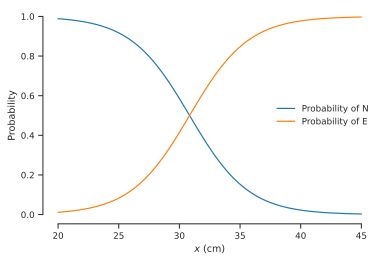

In [12]:
fig, ax = plt.subplots()
xx = np.linspace(20.0, 45.0, 100)
XX = np.hstack([np.ones((xx.shape[0], 1)), xx[:, None]])
predictions_xx = model.predict_proba(XX)
ax.plot(
    xx,
    predictions_xx[:, 0],
    label='Probability of N'
)
ax.plot(
    xx,
    predictions_xx[:, 1],
    label='Probability of E'
)
ax.set_xlabel('$x$ (cm)')
ax.set_ylabel('Probability')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

## Questions

+ What is the probability of an explosion when the height becomes very small?
+ What is the probability of an explosion when the height becomes very large?
+ At what height is it particularly difficult to predict what will happen?

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.
    
    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified 
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

# Logistic Regression with Many Features

Let's repeat what we did for the HMX example.
Instead of using a linear model inside the sigmoid, we will use a quadratic model.
That is, the probability of an explosion will be:

$$
p(y=1|x,\mathbf{w}) = \operatorname{sigm}\left(w_0 + w_1 x + w_2 x^2\right).
$$

Let's load the data first:

In [14]:
url = "https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/lecturebook/data/hmx_data.csv"
download(url)

import pandas as pd

data = pd.read_csv('hmx_data.csv')
x = data['Height'].values
label_coding = {'E': 1, 'N': 0}
y = np.array([label_coding[r] for r in data['Result']])
data['y'] = y
data.head()

,Height,Result,y
0,40.5,E,1
1,40.5,E,1
2,40.5,E,1
3,40.5,E,1
4,40.5,E,1


Now let's train a second degree polynomial model:

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Design matrix
poly = PolynomialFeatures(2)
Phi = poly.fit_transform(x[:, None])

# Fit
# Fit the model
model = LogisticRegression(
    penalty='none',  # Use 'none' instead of None for no regularization
    fit_intercept=False
).fit(Phi, y)

Here are the model parameters:

In [16]:
model.coef_

array([[-0.02784038, -0.41748133,  0.01335223]])

Let's plot the predictions:

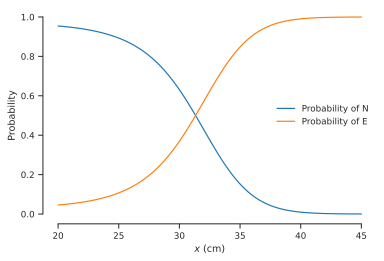

In [17]:
fig, ax = plt.subplots()
xx = np.linspace(20.0, 45.0, 100)
Phi_xx = poly.fit_transform(xx[:, None])
predictions_xx = model.predict_proba(Phi_xx)
ax.plot(
    xx,
    predictions_xx[:, 0],
    label='Probability of N'
)
ax.plot(
    xx,
    predictions_xx[:, 1],
    label='Probability of E'
)
ax.set_xlabel('$x$ (cm)')
ax.set_ylabel('Probability')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

## Questions

+ Is it worth going to a second-degree model? Can you compare the two models?
+ Rerun the code above with polynomial degrees 3, 4, and 5. What do you observe? Do you trust the results? Why or why not?

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.
    
    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified 
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

# Decision making

We demonstrate how to use the results of a binary classifier to make decisions.

## High melting explosives sensitivity
Let's repeat what we did for the HMX example after splitting the dataset into training and validation subsets.
We will be making predictions on the validation subset.

In [19]:
url = "https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/lecturebook/data/hmx_data.csv"
download(url)

import pandas as pd
data = pd.read_csv('hmx_data.csv')
x = data['Height'].values
label_coding = {'E': 1, 'N': 0}
y = np.array([label_coding[r] for r in data['Result']])
data['y'] = y
data.head()

,Height,Result,y
0,40.5,E,1
1,40.5,E,1
2,40.5,E,1
3,40.5,E,1
4,40.5,E,1


Separate data into training and validation:

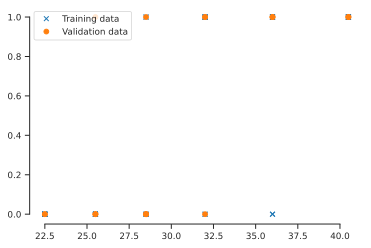

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33)

num_obs = x.shape[0]

fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'x', label='Training data')
ax.plot(x_valid, y_valid, 'o', label='Validation data')
plt.legend(loc='best', frameon=True)
sns.despine(trim=True);

Train the model:

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Design matrix
poly = PolynomialFeatures(2)
Phi = poly.fit_transform(x[:, None])

# Fit
model = LogisticRegression(
    penalty='none',  # Use 'none' instead of None for no regularization
    fit_intercept=False
).fit(Phi, y)


Make probabilistic predictions on the validation data:

In [22]:
Phi_valid = poly.fit_transform(x_valid[:, None])
predictions = model.predict_proba(Phi_valid)
print('x\tp(y=0|x)\tp(y=1|x)\tTrue label')
print('-' * 80)
for i in range(x_valid.shape[0]):
    print(
        f"{x_valid[i]:1.2f}\t"
        + f"{predictions[i, 0]:1.2f}\t\t"
        + f"{predictions[i, 1]:1.2f}\t\t"
        + f"{y_valid[i]:d}"
    )

x	p(y=0|x)	p(y=1|x)	True label
--------------------------------------------------------------------------------
22.50	0.93		0.07		0
32.00	0.43		0.57		0
36.00	0.10		0.90		1
36.00	0.10		0.90		1
28.50	0.75		0.25		1
25.50	0.88		0.12		0
40.50	0.01		0.99		1
22.50	0.93		0.07		0
25.50	0.88		0.12		0
28.50	0.75		0.25		0
25.50	0.88		0.12		1
40.50	0.01		0.99		1
25.50	0.88		0.12		0
32.00	0.43		0.57		1
28.50	0.75		0.25		0
36.00	0.10		0.90		1
32.00	0.43		0.57		1
28.50	0.75		0.25		0
28.50	0.75		0.25		0
40.50	0.01		0.99		1


And here is a nice way to visualize these probabilities:

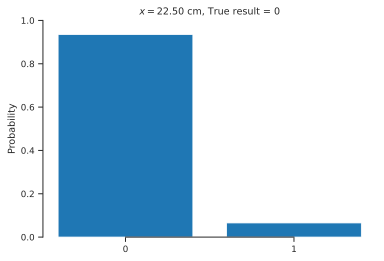

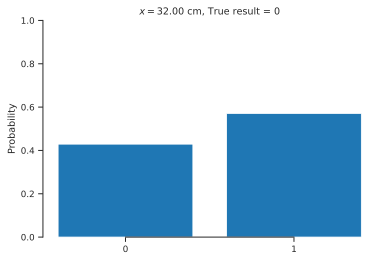

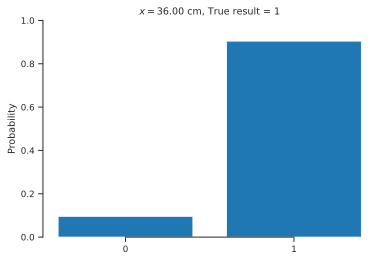

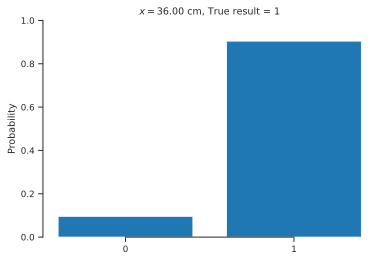

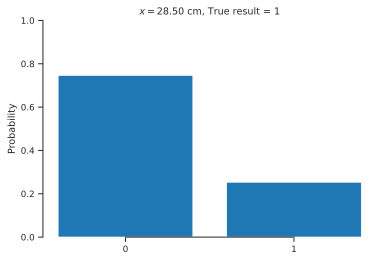

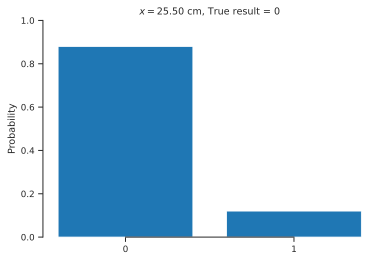

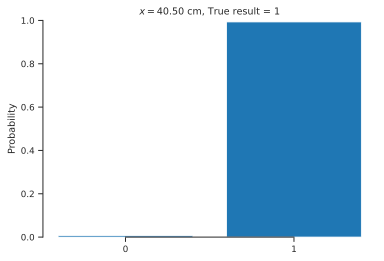

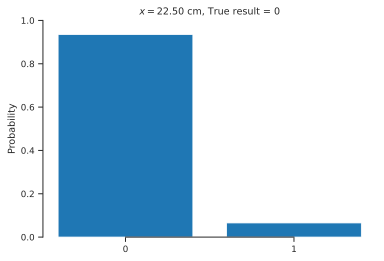

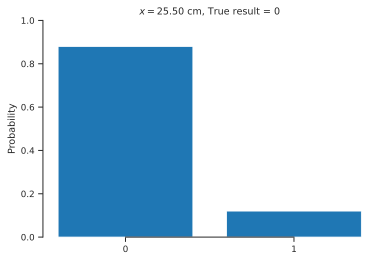

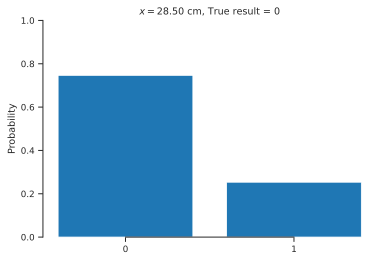

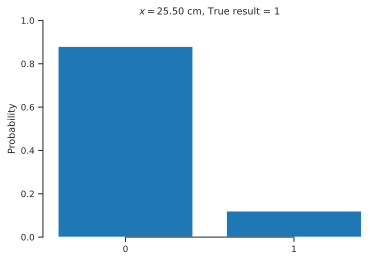

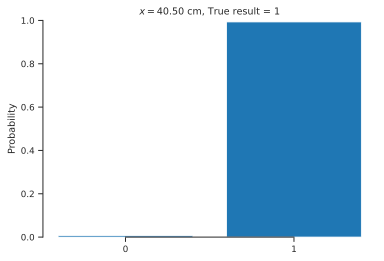

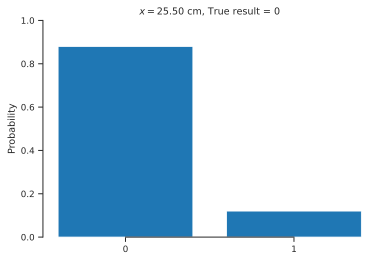

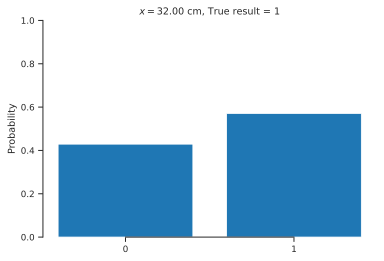

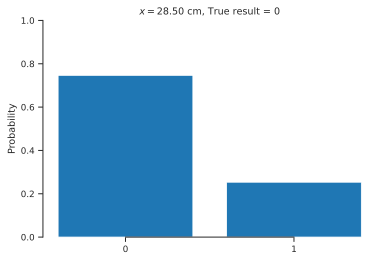

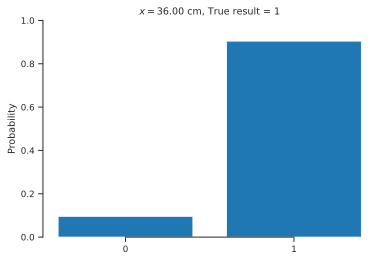

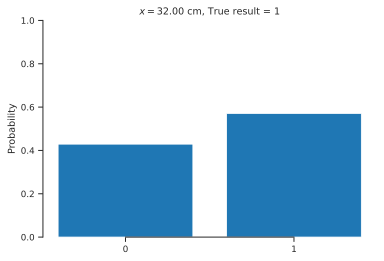

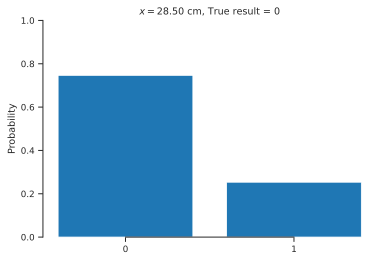

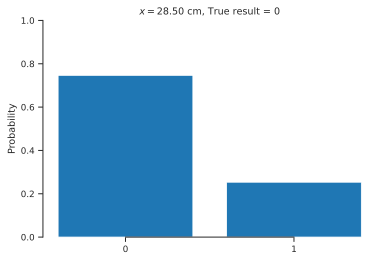

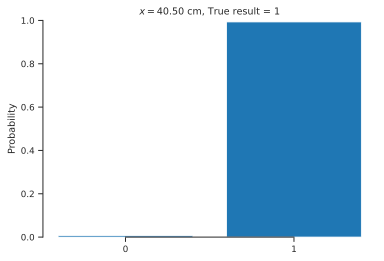

In [23]:
for i in range(x_valid.shape[0]):
    fig, ax = plt.subplots()
    ax.bar(np.arange(2), predictions[i])
    ax.set_title(f'$x={x_valid[i]:1.2f}$ cm, True result = {y_valid[i]:d}')
    ax.set_ylim([0, 1.0])
    ax.set_xticks([0, 1])
    ax.set_xticklabels(model.classes_)
    ax.set_ylabel('Probability')
    sns.despine(trim=True)

Now we are ready to pose and solve the decision-making problem.
We just need to define a cost matrix:

In [24]:
# c_00 = cost of correctly picking 0 when 0 is true
# c_01 = cost of wrongly picking 0 when 1 is true
# c_11 = cost of correctly picking 1 when 1 is true
# c_10 = cost of wrongly picking 1 when 0 is true
cost_matrix = np.array(
    [
        [0.0, 1.0],
        [1.0, 0.0]
    ]
)

Here is some code that computes the expected cost of each choice given the predicted probabilities:

In [25]:
def expected_cost(cost_matrix, prediction_prob):
    """Calculate the expected cost of each decision.
    
    Arguments
    cost_matrix     --  A D x D matrix. `cost_matrix[i, j]`
                        is the cost of picking `i` and then
                        `j` happens.
    prediction_prob --  An array with D elements containing
                        the probability that each event
                        happens.
    """
    assert cost_matrix.ndim == 2
    D = cost_matrix.shape[0]
    assert cost_matrix.shape[1] == D
    assert prediction_prob.ndim == 1
    assert prediction_prob.shape[0] == D
    res = np.zeros((2,))
    for i in range(2):
        res[i] = (
            cost_matrix[i, 0] * prediction_prob[0]
            + cost_matrix[i, 1] * prediction_prob[1]
        )
    return res

As a demonstration, here is the expected cost of each decision for the first few validation points.
We will put a star (\*) next to the choice with minimum cost.

In [26]:
print('x\tCost of 0\tCost of 1\tTrue label\tChoice')
print('-' * 80)
for i in range(x_valid.shape[0]):
    exp_c = expected_cost(cost_matrix, predictions[i])
    line = f'{x_valid[i]:1.2f}\t{exp_c[0]:1.2f}'
    tmp = f'\t\t{exp_c[1]:1.2f}'
    correct_choice = True
    if exp_c[0] < exp_c[1]:
        line += '*'
        if y_valid[i] == 1:
            correct_choice = False
    else:
        tmp += '*'
        if y_valid[i] == 0:
            correct_choice = False
    line += tmp + f'\t\t{y_valid[i]}'
    if correct_choice:
        line += '\t\tCORRECT'
    else:
        line += '\t\tWRONG'
    print(line)

x	Cost of 0	Cost of 1	True label	Choice
--------------------------------------------------------------------------------
22.50	0.07*		0.93		0		CORRECT
32.00	0.57		0.43*		0		WRONG
36.00	0.90		0.10*		1		CORRECT
36.00	0.90		0.10*		1		CORRECT
28.50	0.25*		0.75		1		WRONG
25.50	0.12*		0.88		0		CORRECT
40.50	0.99		0.01*		1		CORRECT
22.50	0.07*		0.93		0		CORRECT
25.50	0.12*		0.88		0		CORRECT
28.50	0.25*		0.75		0		CORRECT
25.50	0.12*		0.88		1		WRONG
40.50	0.99		0.01*		1		CORRECT
25.50	0.12*		0.88		0		CORRECT
32.00	0.57		0.43*		1		CORRECT
28.50	0.25*		0.75		0		CORRECT
36.00	0.90		0.10*		1		CORRECT
32.00	0.57		0.43*		1		CORRECT
28.50	0.25*		0.75		0		CORRECT
28.50	0.25*		0.75		0		CORRECT
40.50	0.99		0.01*		1		CORRECT


Notice that most of the choices are correct. But there are some wrong choices.
The particularly bad wrong choices are the ones where we predict 0 (no explosion), but there is an explosion. Are there any such cases?

Let me show you another very nice way to compute the expected cost for all the validation points in one line.
This way is using the [einsum](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html) function (Einstein summation convention).
It takes a while to understand what it does, but if you do, you can shorten your linear algebra code by a lot.
The idea is that repeated indices are summed over.

In [27]:
exp_cost = np.einsum('ij,kj->ki', cost_matrix, predictions)
print(exp_cost)

[[0.06527731 0.93472269]
 [0.57087875 0.42912125]
 [0.90441891 0.09558109]
 [0.90441891 0.09558109]
 [0.25337129 0.74662871]
 [0.12011635 0.87988365]
 [0.99307148 0.00692852]
 [0.06527731 0.93472269]
 [0.12011635 0.87988365]
 [0.25337129 0.74662871]
 [0.12011635 0.87988365]
 [0.99307148 0.00692852]
 [0.12011635 0.87988365]
 [0.57087875 0.42912125]
 [0.25337129 0.74662871]
 [0.90441891 0.09558109]
 [0.57087875 0.42912125]
 [0.25337129 0.74662871]
 [0.25337129 0.74662871]
 [0.99307148 0.00692852]]


Here is yet another way to visualize the decisions of binary classification:

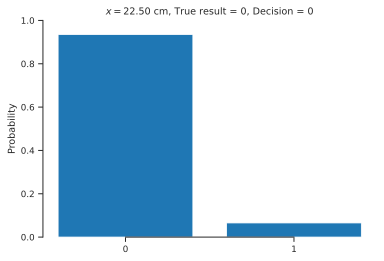

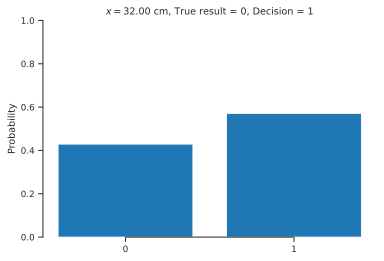

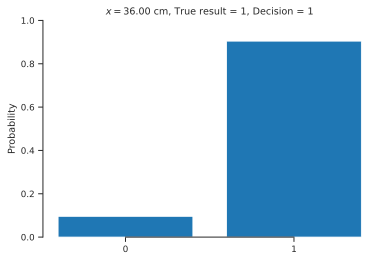

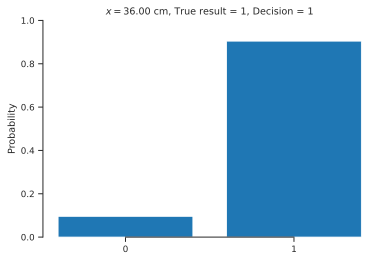

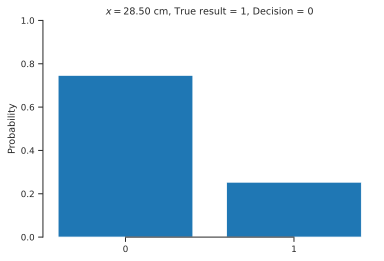

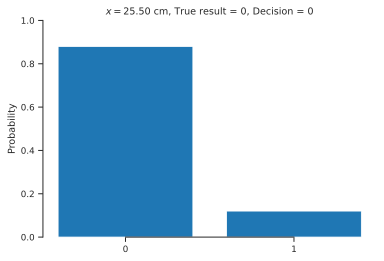

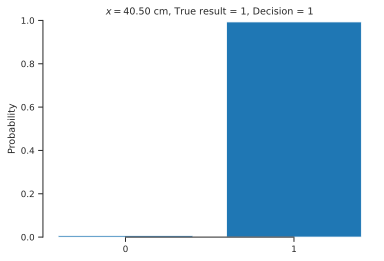

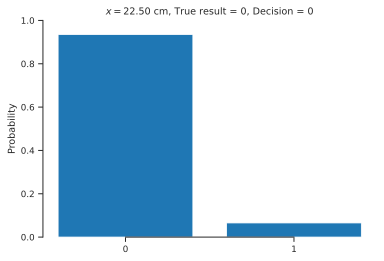

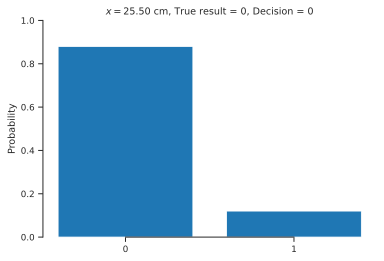

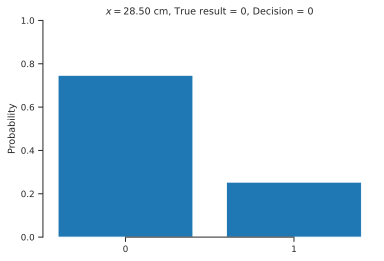

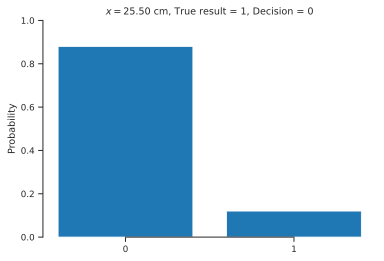

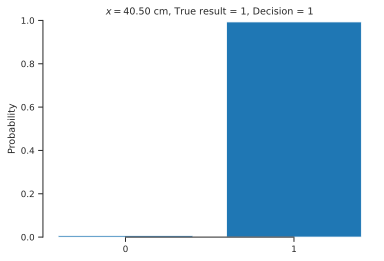

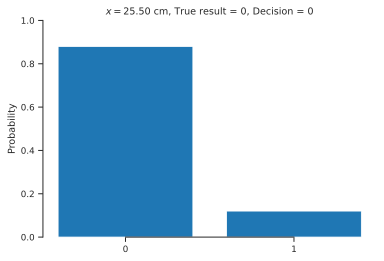

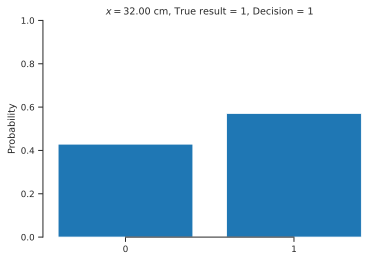

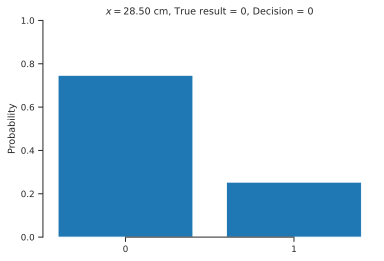

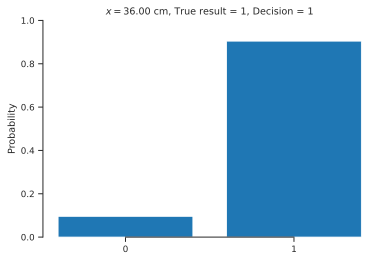

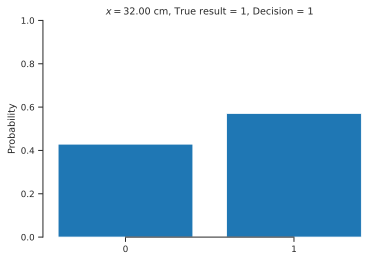

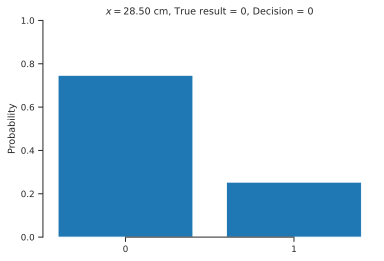

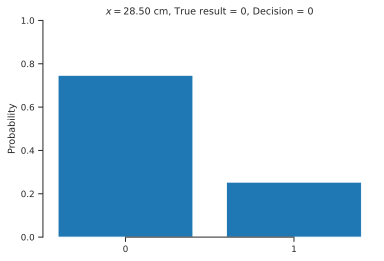

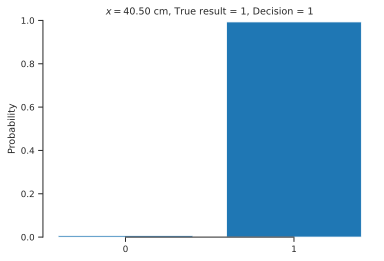

In [28]:
for i in range(x_valid.shape[0]):
    # Make decision
    decision = model.classes_[np.argmin(exp_cost[i])]
    fig, ax = plt.subplots()
    ax.bar(np.arange(2), predictions[i])
    ax.set_title(
        f'$x={x_valid[i]:1.2f}$ cm, '
        + f'True result = {y_valid[i]:d}, '
        + f'Decision = {decision:d}'
    )
    ax.set_ylim([0, 1.0])
    ax.set_xticks([0, 1])
    ax.set_xticklabels(model.classes_)
    ax.set_ylabel('Probability')
    sns.despine(trim=True)

Now let's plot the decision boundary of our model:

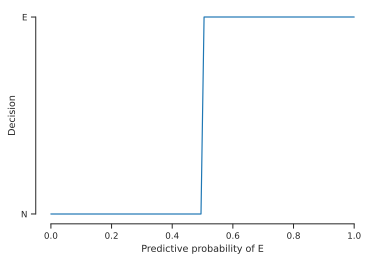

In [29]:
fig, ax = plt.subplots()
pE = np.linspace(0, 1, 100)
pN = 1.0 - pE
probs = np.hstack([pN[:, None], pE[:, None]])
exp_cost = np.einsum('ij,kj->ki', cost_matrix, probs)
decision_idx = np.argmin(exp_cost, axis=1)
ax.plot(pE, decision_idx)
ax.set_yticks([0, 1])
ax.set_yticklabels(['N', 'E'])
ax.set_ylabel('Decision')
ax.set_xlabel('Predictive probability of E')
sns.despine(trim=True)

### Questions

+ Repeat the analysis above with a different cost matrix that penalizes more by calling a non-explosion when there is an explosion.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.
    
    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified 
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

# Diagnostics for Classifications

We show how to assess the quality of a classification model.

## High melting explosives sensitivity
Let's repeat what we did for the HMX example after splitting the dataset into training and validation subsets.
We will be making predictions on the validation subset.

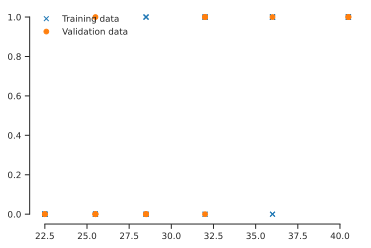

In [31]:
import pandas as pd
data = pd.read_csv('hmx_data.csv')
x = data['Height'].values
label_coding = {'E': 1, 'N': 0}
y = np.array([label_coding[r] for r in data['Result']])
data['y'] = y

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33)

num_obs = x.shape[0]

fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'x', label='Training data')
ax.plot(x_valid, y_valid, 'o', label='Validation data')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

Fit the model like before:

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Design matrix
poly = PolynomialFeatures(2)
Phi = poly.fit_transform(x[:, None])

# Fit
model = LogisticRegression(
    penalty='none',
    fit_intercept=False
).fit(Phi, y)

Predict on validation:

In [33]:
Phi_valid = poly.fit_transform(x_valid[:, None])
predictions = model.predict_proba(Phi_valid)

Decide:

In [34]:
cost_matrix = np.array(
    [
        [0.0, 1.0],
        [1.0, 0.0]
    ]
)

exp_cost = np.einsum('ij,ki->kj', cost_matrix, predictions)
y_pred = np.argmin(exp_cost, axis=1)

print('x\tCost of 0\tCost of 1\tTrue label\tChoice')
print('-' * 80)
for i in range(x_valid.shape[0]):
    exp_c = exp_cost[i]
    line = f'{x_valid[i]:1.2f}\t{exp_c[0]:1.2f}'
    tmp = f'\t\t{exp_c[1]:1.2f}'
    correct_choice = True
    if exp_c[0] < exp_c[1]:
        line += '*'
        if y_valid[i] == 1:
            correct_choice = False
    else:
        tmp += '*'
        if y_valid[i] == 0:
            correct_choice = False
    line += tmp + f'\t\t{y_valid[i]}'
    if correct_choice:
        line += '\t\tCORRECT'
    else:
        line += '\t\tWRONG'
    print(line)

x	Cost of 0	Cost of 1	True label	Choice
--------------------------------------------------------------------------------
25.50	0.12*		0.88		0		CORRECT
32.00	0.57		0.43*		1		CORRECT
25.50	0.12*		0.88		0		CORRECT
36.00	0.90		0.10*		1		CORRECT
32.00	0.57		0.43*		0		WRONG
40.50	0.99		0.01*		1		CORRECT
32.00	0.57		0.43*		1		CORRECT
40.50	0.99		0.01*		1		CORRECT
28.50	0.25*		0.75		0		CORRECT
22.50	0.07*		0.93		0		CORRECT
28.50	0.25*		0.75		0		CORRECT
28.50	0.25*		0.75		0		CORRECT
22.50	0.07*		0.93		0		CORRECT
40.50	0.99		0.01*		1		CORRECT
28.50	0.25*		0.75		0		CORRECT
25.50	0.12*		0.88		1		WRONG
25.50	0.12*		0.88		0		CORRECT
32.00	0.57		0.43*		1		CORRECT
22.50	0.07*		0.93		0		CORRECT
25.50	0.12*		0.88		0		CORRECT


First, let's calculate the accuracy score:

In [35]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_valid, y_pred)

print(f'HMX Accuracy = {acc * 100:1.2f} %')

HMX Accuracy = 90.00 %


Not bad. But let's also look at the balanced accuracy score:

In [36]:
from sklearn.metrics import balanced_accuracy_score

bacc = balanced_accuracy_score(y_valid, y_pred)

print(f'HMX balanced accuracy = {bacc * 100:1.2f} %')

HMX balanced accuracy = 89.58 %


Now, let's look at the confusion matrix:

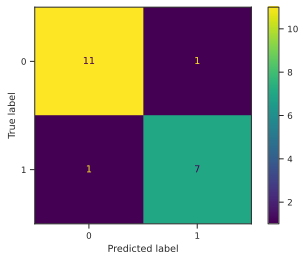

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(
    y_valid,
    y_pred,
    labels=model.classes_
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=model.classes_
)
disp.plot();

### Questions

+ Repeat the analysis above with a higher degree polynomial, say 5. Is the result better or worse? Why?